## logistic regression for face recognition

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import re
import os
# PIL
from PIL import Image

class MultinomialLogisticRegression:
    
    def __init__(self, n_iter = 10000, thres=1e-3):
        self.n_iter = n_iter
        self.thres = thres
    
    def fit(self, X, y, batch_size=64, lr=0.001, rand_seed=4, verbose=False): 
        np.random.seed(rand_seed) 
        self.classes = np.unique(y)
        self.class_labels = {c:i for i,c in enumerate(self.classes)}
        X = self.add_bias(X)
        y = self.one_hot(y)
        self.loss = []
        self.weights = np.zeros(shape=(len(self.classes),X.shape[1]))
        self.fit_data(X, y, batch_size, lr, verbose)
        return self
 
    def fit_data(self, X, y, batch_size, lr, verbose):
        i = 0
        while (not self.n_iter or i < self.n_iter):
            self.loss.append(self.cross_entropy(y, self.predict_(X)))
            idx = np.random.choice(X.shape[0], batch_size)
            X_batch, y_batch = X[idx], y[idx]
            error = y_batch - self.predict_(X_batch)
            update = (lr * np.dot(error.T, X_batch))
            self.weights += update
            if np.abs(update).max() < self.thres: break
            if i % 1000 == 0 and verbose: 
                print(' Training Accuray at {} iterations is {}'.format(i, self.evaluate_(X, y)))
            i +=1
    
    def predict(self, X):
        return self.predict_(self.add_bias(X))
    
    def predict_(self, X):
        pre_vals = np.dot(X, self.weights.T).reshape(-1,len(self.classes))
        return self.softmax(pre_vals)
    
    # def softmax(self, z):
    #     return np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1,1)

    def softmax(self, z):
        max_z = np.max(z, axis=1, keepdims=True)
        exp_z = np.exp(z - max_z)
        softmax_output = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        return softmax_output

    def predict_classes(self, X):
        self.probs_ = self.predict(X)
        return np.vectorize(lambda c: self.classes[c])(np.argmax(self.probs_, axis=1))
  
    def add_bias(self,X):
        return np.insert(X, 0, 1, axis=1)
  
    def get_randon_weights(self, row, col):
        return np.zeros(shape=(row,col))

    def one_hot(self, y):
        return np.eye(len(self.classes))[np.vectorize(lambda c: self.class_labels[c])(y).reshape(-1)]
    
    def score(self, X, y):
        return np.mean(self.predict_classes(X) == y)
    
    def evaluate_(self, X, y):
        return np.mean(np.argmax(self.predict_(X), axis=1) == np.argmax(y, axis=1))
    
    # def cross_entropy(self, y, probs):
    #     return -1 * np.mean(y * np.log(probs))
    def cross_entropy(self, y, probs, epsilon=1e-15):
        probs = np.clip(probs, epsilon, 1 - epsilon)  # Clip probabilities to avoid zeros and ones.
        return -1 * np.mean(y * np.log(probs))


In [4]:
def load_yale_faces_gif_updated(directory):
    """
    Load the Yale Face Database images (GIF format) and labels, with updated file pattern.

    Parameters:
    directory (str): Path to the directory containing the Yale Face Database.

    Returns:
    tuple: A tuple containing:
        - X (numpy.ndarray): The image data, reshaped into rows.
        - y (numpy.ndarray): The labels corresponding to each image.
    """
    file_names = [f for f in os.listdir(directory) if re.match(r'subject\d{2}\..*', f)]
    data = []
    labels = []

    for file_name in file_names:
        # Extract the subject number as the label
        label = int(file_name[7:9]) 
        labels.append(label)

        # Open the image using PIL and convert to grayscale
        image_path = os.path.join(directory, file_name)
        with Image.open(image_path) as img:
            grayscale_img = img.convert('L')  # Convert to grayscale
            # Convert to numpy array and flatten
            flat_image = np.array(grayscale_img).flatten()
            data.append(flat_image)

    X = np.array(data)
    y = np.array(labels)
    # pca = PCA(n_components=100)
    # X = pca.fit_transform(X)
    
    return X, y
data_folder = "data"  # Update with correct path
X_new, y_new = load_yale_faces_gif_updated(data_folder)

# sort the data by labels
idx = np.argsort(y_new)
X_new = X_new[idx]
y_new = y_new[idx]

# are there zeros in the data?
print(np.any(X_new == 0))
# which ones are they?
print(np.where(X_new == 0))

# replace zeros with 1s
X_new[X_new == 0] = 1

# display a few images  
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_new[i].reshape(243, 320), cmap='gray')
    plt.axis('off')
plt.show()

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=4)

print(X_new[0])

FileNotFoundError: [Errno 2] No such file or directory: 'data'

In [ ]:
# display one images for every label (0 to 14)

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 5, figsize=(15, 9))  # Adjust the size as needed

for i in range(15):
    # Select every 11th image from X_new
    index = i * 11
    ax = axes[i // 5, i % 5]  # Determine the position of the subplot
    ax.imshow(X_new[index].reshape(243, 320), cmap='gray')  # Adjust the reshape dimensions as per your data
    ax.set_title(f'Label: {i}')
    ax.axis('off')

plt.tight_layout()
plt.show()

NameError: name 'X_new' is not defined

Error in callback <function flush_figures at 0x109f86480> (for post_execute):


KeyboardInterrupt: 

## Implementation Evaluation

0.8787878787878788


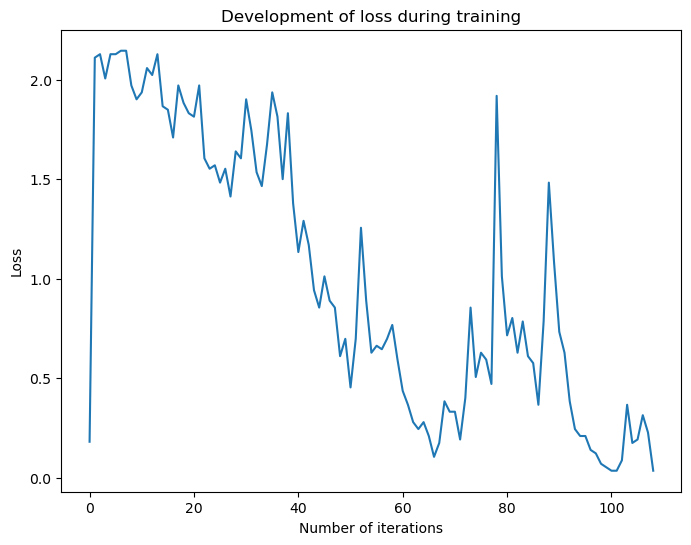

In [ ]:
X,y = X_train, y_train
face = MultinomialLogisticRegression(thres=1e-5)
face.fit(X,y,lr=0.004)
# print the accuracy percentage
accuracy_percentage = face.score(X_test, y_test) * 100
formatted_accuracy = "{:.2f}%".format(accuracy_percentage)

print("Accuracy: " + formatted_accuracy)

fig = plt.figure(figsize=(8,6))

plt.plot(np.arange(len(face.loss)), face.loss)
plt.title("Development of loss during training")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

[[2 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 4 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 2]]


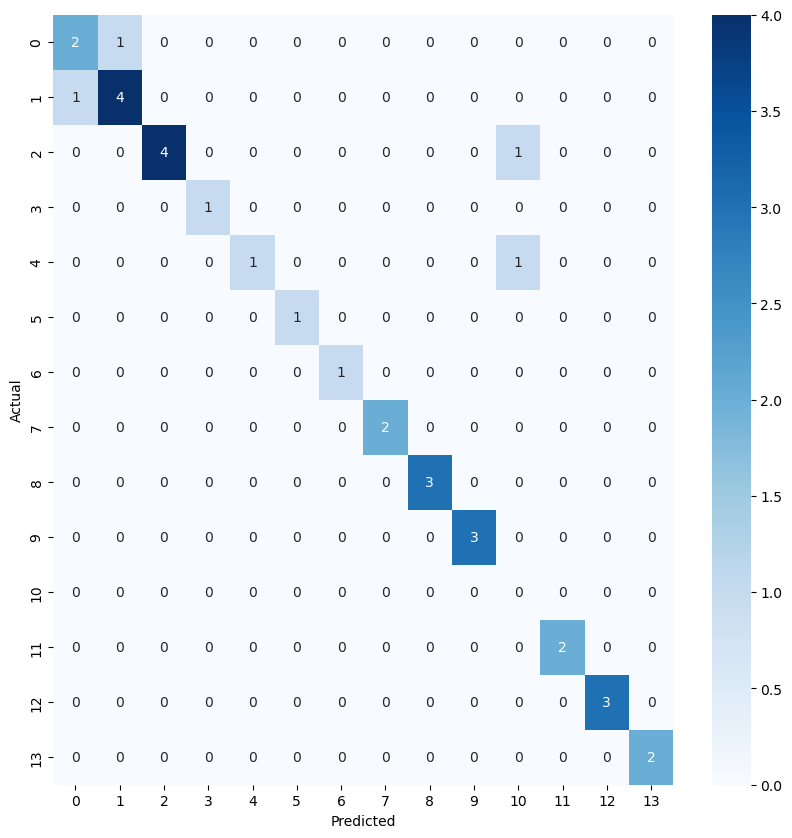

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = lr.predict_classes(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
fig = plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# save figure
fig.savefig('confusion_matrix.png')